In [1]:
import numpy as np
from scipy import fft
from PIL import Image
import matplotlib.pyplot as plt

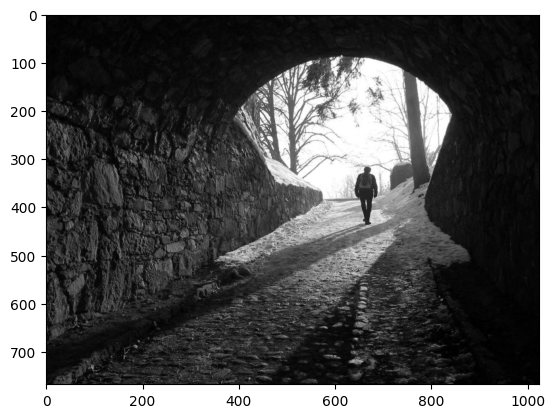

In [3]:
f = np.array(Image.open('./assets/tun.jpg').convert('L'))

# Plot the image
plt.imshow(f, cmap='gray')
plt.show()


In [17]:
# f(x,y) -> ln -> DFT -> H(u,v) -> (DFT)^-1 -> exp -> g(x,y)
def homomorphic_filtering(f, y_H=0.4, y_L=1.6, c=1, D_0=0.1):
    # ln -> DFT
    X = fft.fft2(np.log(f + 1e-8))

    # H(u,v)
    x, y = X.shape
    d_center = np.array([x // 2, y // 2])
    # D(u,v): Distancia desde el origen
    D = np.array([np.sqrt((range(x) - d_center[0])**2 + (i - d_center[1])**2) for i in range(y)]).T

    # Diseño del filtro
    # H = (yH - yL) * [1-e^(-c*(D(u,v)^2 / D0^2))] + yL
    H = (y_H - y_L) * (1 - np.exp(-c *(D**2 / (D_0 * x)**2))) + y_L
    
    # Normalización del filtro
    H = np.interp(H, (H.min(), H.max()), (H.min(), 1))

    # Aplicación del filtro en el dominio de la frecuencia
    Y = np.multiply(X, H)

    # (DFT)^-1 -> exp -> g(x,y)
    g = np.exp(fft.ifft2(Y).real)

    return g, H

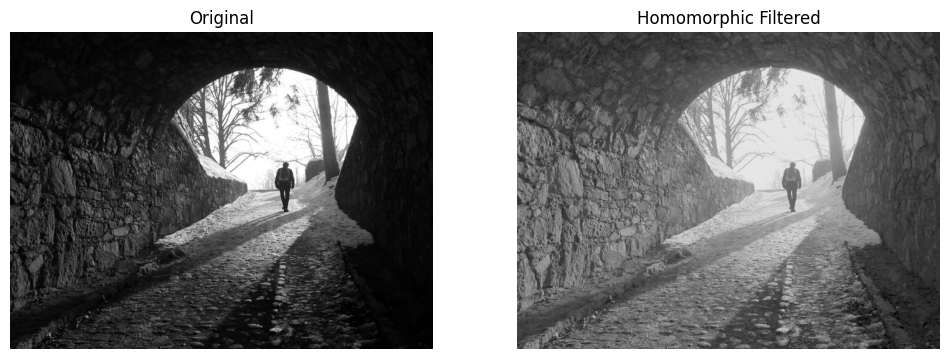

In [22]:
g, H = homomorphic_filtering(f)

plt.figure(figsize=(12,8)) 
ax = plt.subplot(1,2,1)
ax.imshow(f, cmap='gray')
ax.axis('off')
ax.set_title('Original')

ax = plt.subplot(1,2,2)
ax.imshow(g, cmap='gray')
ax.set_title(f'Homomorphic Filtered')
ax.axis('off')

plt.show()